## Creating Networks in Python with NetworkX

### Create and visualize simple graphs
Here we create a simple directed graph using the NetworkX library in Python. We then visualize the graph using the matplotlib library.

In [5]:
# Install the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [13]:
# Create a directed graph
g1 = nx.DiGraph()

# Add edges to the graph
edges1 = [(1, 2), (1, 3), (2, 4), (3, 1), (3, 5), (5, 1), (4, 3)]
g1.add_edges_from(edges1)

# Print a summary of the graph
print(f"Number of nodes: {len(g1.nodes)}")
print(f"Number of edges: {len(g1.edges)}")
print(f"Average degree: {sum(dict(g1.degree).values()) / len(g1.nodes)}")

Number of nodes: 5
Number of edges: 7
Average degree: 2.8


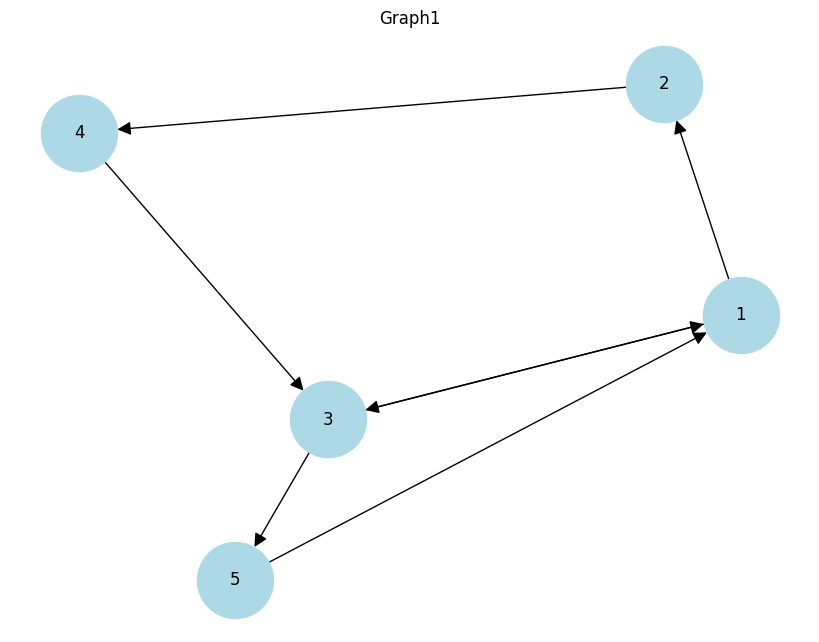

In [19]:
# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(g1, with_labels=True, node_color="lightblue", node_size=3000, arrowsize=20)
plt.title("Graph1")
plt.show()

Next, we define another where we are giving more meaningful names, creating a directed network.

In [15]:
# Create another undirected graph with meaningful names
g2 = nx.Graph()

# Add edges to the graph
edges2 = [
    ("Anand", "Beth"),
    ("Anand", "Chris"),
    ("Beth", "Dieter"),
    ("Chris", "Sun"),
    ("Chris", "Ali"),
    ("Beth", "Ali"),
    ("Ali", "Sun"),
    ("Sun", "Beth"),
    ("Fatima", "Chris"),
    ("Fatima", "Sun"),
]
g2.add_edges_from(edges2)

# Print a summary of the graph
print(f"Number of nodes: {len(g2.nodes)}")
print(f"Number of edges: {len(g2.edges)}")
print(f"Average degree: {sum(dict(g2.degree).values()) / len(g2.nodes)}")

Number of nodes: 7
Number of edges: 10
Average degree: 2.857142857142857


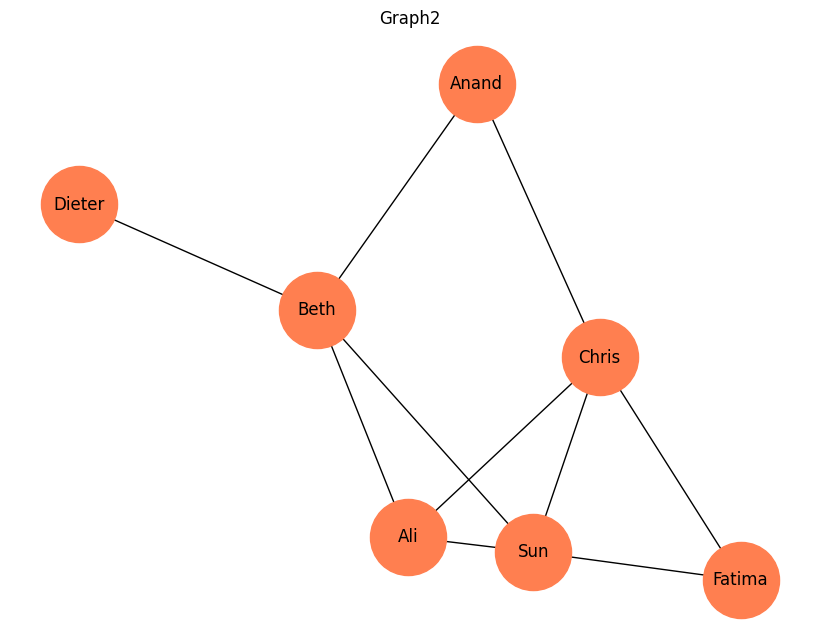

In [18]:
# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(g2, with_labels=True, node_color="coral", node_size=3000)
plt.title("Graph2")
plt.show()

### Adjacency Matrices
Recall that networks are graphs and can be represented as a matrix. This matrix may be referred to as a “sociomatrix” or an “adjacency matrix”.

In [20]:
# Create adjacency matrix of g1 and g2
adj1 = nx.adjacency_matrix(g1).todense()
adj2 = nx.adjacency_matrix(g2).todense()

print(f"Adjacency matrix of g1: \n{adj1}")
print(f"Adjacency matrix of g2: \n{adj2}")

Adjacency matrix of g1: 
[[0 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]]
Adjacency matrix of g2: 
[[0 1 1 0 0 0 0]
 [1 0 0 1 1 1 0]
 [1 0 0 0 1 1 1]
 [0 1 0 0 0 0 0]
 [0 1 1 0 0 1 1]
 [0 1 1 0 1 0 0]
 [0 0 1 0 1 0 0]]


### Edge List
One can also represent a network as an “edge list” instead of a sociomatrix. An edge list is a long record of every connection that exists in a network. Accordingly, an edge list only records the relationships that exist — not those relationships which do not. Like a spares matrix, this suppression of information allows edge lists to occupy less memory, which is sometimes desirable when working with very large networks. Note that if there are total isolates in a network, they will not be present in the edge list because totally isolated actors are, by definition, unconnected.

In [24]:
# Create an edge list of g2
edge_list = nx.to_pandas_edgelist(g2)
edge_list.rename(columns={"source": "vertex1", "target": "vertex2"}, inplace=True)
print("Edge list of g2:")
edge_list

Edge list of g2:


,vertex1,vertex2
0,Anand,Beth
1,Anand,Chris
2,Beth,Dieter
3,Beth,Ali
4,Beth,Sun
5,Chris,Sun
6,Chris,Ali
7,Chris,Fatima
8,Sun,Ali
9,Sun,Fatima


### Edge and Vertex Attributes

In [25]:
# Access the edges and the vertices of g2
print(f"Edges of g2: {g2.edges}")
print(f"Vertices of g2: {g2.nodes}")

Edges of g2: [('Anand', 'Beth'), ('Anand', 'Chris'), ('Beth', 'Dieter'), ('Beth', 'Ali'), ('Beth', 'Sun'), ('Chris', 'Sun'), ('Chris', 'Ali'), ('Chris', 'Fatima'), ('Sun', 'Ali'), ('Sun', 'Fatima')]
Vertices of g2: ['Anand', 'Beth', 'Chris', 'Dieter', 'Sun', 'Ali', 'Fatima']


In [26]:
print(g2.nodes)

['Anand', 'Beth', 'Chris', 'Dieter', 'Sun', 'Ali', 'Fatima']


In [39]:
# Assign a gender to each node
gender_dict = {"Anand": "M", "Beth": "F", "Chris": "M", "Dieter": "M", "Sun": "F", "Ali": "M", "Fatima": "F"}
nx.set_node_attributes(g2, gender_dict, "gender")

# Assign a count to each edge
# Replicate the the list [1, 2] 5 times
count_values = [1, 2] * 5
for i, edge in enumerate(g2.edges()):
    g2.edges[edge]["count"] = count_values[i]

# Assign an age to each person
age_dict = {0: 20, 1: 26, 2: 19, 3: 34, 4: 22, 5: 30, 6: 21}
nx.set_node_attributes(g2, age_dict, "age")

In [40]:
# Print the node attributes
for node in g2.nodes(data=True):
    print(node)

('Anand', {'gender': 'M'})
('Beth', {'gender': 'F'})
('Chris', {'gender': 'M'})
('Dieter', {'gender': 'M'})
('Sun', {'gender': 'F'})
('Ali', {'gender': 'M'})
('Fatima', {'gender': 'F'})


### Networks From Matrices and Networks From Edge Lists

We can also use the data structures introduced above - i.e., adjacency matrices and edge lists - to create network objects. These are the most common ways in which network datasets are stored, and they will almost always be the ways that we provide network datasets to you in this course. So, it’s important that you know how to take data files with adjacency matrices or edge lists, bring them into Python, and create network objects.

In [43]:
# Load the dataset
s = pd.read_csv("../data/students.csv")
s.head()

,Student,Gender,Harry,Emilie,Mary,Jon,Peter,Karen,Sara,Corinne,Tom,Irene,Greg,Betty,Anna,Olivia,Fred
0,Harry,M,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,Emilie,F,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,Mary,F,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,Jon,M,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Peter,M,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [52]:
# Create an empty graph
studentmat = nx.DiGraph()

# Add edges to the graph
for index, row in s.iterrows():
    student = row["Student"]
    for col in s.columns[2:]:
        if row[col] == 1:
            studentmat.add_edge(student, col)

In [53]:
# Add gender as an attribute
gender_dict = s.set_index("Student")["Gender"].to_dict()
nx.set_node_attributes(studentmat, gender_dict, "gender")

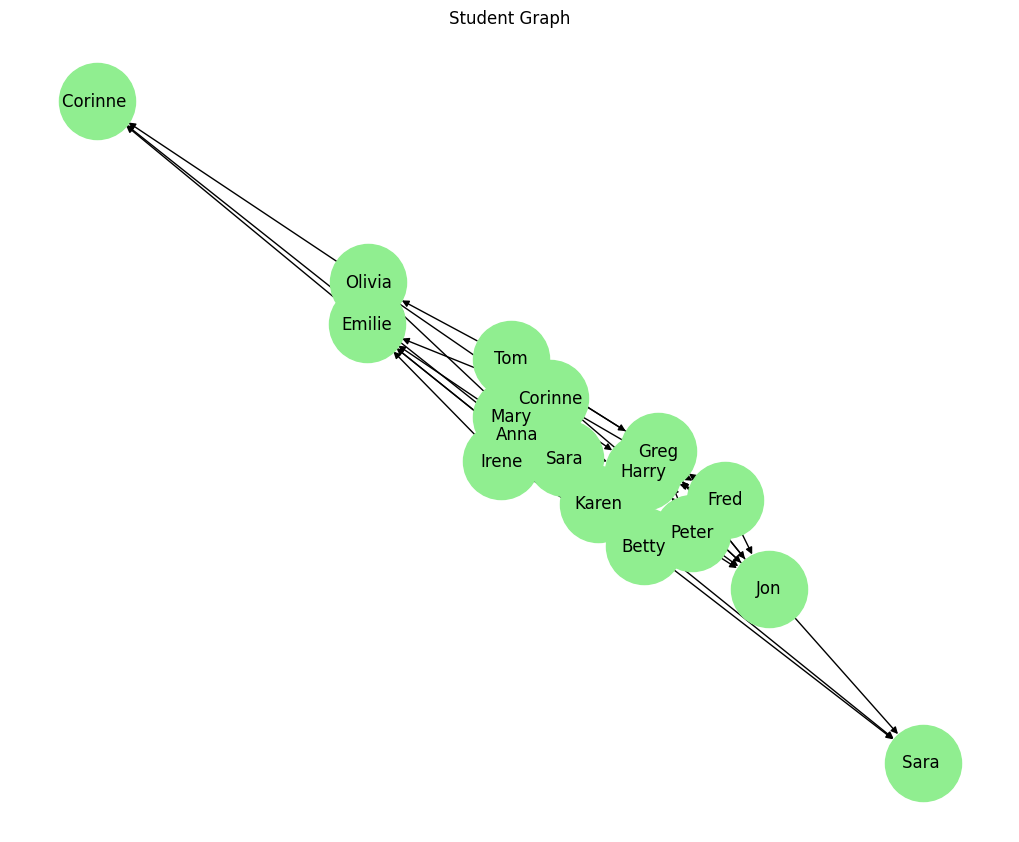

In [54]:
# Visualize the graph
plt.figure(figsize=(10, 8))
nx.draw(studentmat, with_labels=True, node_color="lightgreen", node_size=3000)
plt.title("Student Graph")
plt.show()